<a href="https://colab.research.google.com/github/dgalian/FTW_B7/blob/main/Feature%20Engineering/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Loading data
bookers = pd.read_csv('https://raw.githubusercontent.com/dgalian/FTW_B7/main/Feature%20Engineering/customer_table.csv', index_col=0)
bookings = pd.read_csv('https://raw.githubusercontent.com/dgalian/FTW_B7/main/Feature%20Engineering/customer_flights.csv', index_col=0)

In [ ]:
# Customer information
bookers.head()

,age,sex,region,major_region,married,no_of_children
customer_id,,,,,,
1,36,F,Region 3 - Central Luzon,Luzon,True,2
2,37,M,Region 9 - Zamboanga,Mindanao,False,0
3,29,M,Region 6 - W. Visayas,Visayas,False,2
4,25,F,Region 3 - Central Luzon,Luzon,True,1
5,36,F,Region 4 - CALABARZON,Luzon,False,0


In [ ]:
# Flight/transaction information
bookings.head()

,customer_id,flight_destination,flight_date,n_guests,booking_date,total_spend,flight_type
transaction_id,,,,,,,
1,1,Domestic,2022-05-25,6,2022-05-16,4927.602815,Round-Trip
2,1,Domestic,2022-12-04,4,2022-11-23,12057.893554,Round-Trip
3,2,Domestic,2022-11-10,1,2022-10-22,5278.180024,Round-Trip
4,2,Long Haul,2022-12-03,1,2022-10-01,11990.266332,One-way
5,2,Domestic,2022-12-08,1,2022-11-29,4199.343073,Round-Trip


**Feature Engineering**

* Customer segmentation - Clustering

* Why is representing data numerically efficient? - so that we only use a small amount of variables (no need to use dummy variables)

* Granularity of final data - by customer_id for customer segmentation

# Deriving Features from Flights Dataset

In [ ]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20007 entries, 1 to 20007
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         20007 non-null  int64  
 1   flight_destination  20007 non-null  object 
 2   flight_date         20007 non-null  object 
 3   n_guests            20007 non-null  int64  
 4   booking_date        20007 non-null  object 
 5   total_spend         20007 non-null  float64
 6   flight_type         20007 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ MB


**Reduce number of variables**

We can reduce the number of variables by changing categorical data into numerical data

In [ ]:
bookings['flight_destination'].value_counts()

Domestic      11192
Short Haul     5063
Long Haul      3752
Name: flight_destination, dtype: int64

In [ ]:
# Engineer a boolean feature: Domestic or not
bookings['is_domestic'] = np.where(bookings['flight_destination']=='Domestic',1,0)

In [ ]:
bookings['flight_type'].value_counts()

One-way       12614
Round-Trip     6066
Open Jaw       1327
Name: flight_type, dtype: int64

In [ ]:
# Engineer a boolean feature: One-way or not
bookings['is_one_way'] = np.where(bookings['flight_type']=='One-way',1,0)

**Turn dates into numerical data**

In [ ]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20007 entries, 1 to 20007
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         20007 non-null  int64  
 1   flight_destination  20007 non-null  object 
 2   flight_date         20007 non-null  object 
 3   n_guests            20007 non-null  int64  
 4   booking_date        20007 non-null  object 
 5   total_spend         20007 non-null  float64
 6   flight_type         20007 non-null  object 
 7   is_domestic         20007 non-null  int64  
 8   is_one_way          20007 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 1.5+ MB


In [ ]:
# Changing the data type of the dates
bookings['flight_date'] = pd.to_datetime(bookings['flight_date'], errors='coerce')
bookings['booking_date'] = pd.to_datetime(bookings['booking_date'], errors='coerce')
bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20007 entries, 1 to 20007
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         20007 non-null  int64         
 1   flight_destination  20007 non-null  object        
 2   flight_date         20007 non-null  datetime64[ns]
 3   n_guests            20007 non-null  int64         
 4   booking_date        20007 non-null  datetime64[ns]
 5   total_spend         20007 non-null  float64       
 6   flight_type         20007 non-null  object        
 7   is_domestic         20007 non-null  int64         
 8   is_one_way          20007 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 1.5+ MB


In [ ]:
# Engineer a feature for the number of days a flight was booked in advance
import datetime as dt
bookings['days_advanced'] = bookings['flight_date'] - bookings['booking_date']
bookings['days_advanced'] = bookings['days_advanced'].dt.days
bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20007 entries, 1 to 20007
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         20007 non-null  int64         
 1   flight_destination  20007 non-null  object        
 2   flight_date         20007 non-null  datetime64[ns]
 3   n_guests            20007 non-null  int64         
 4   booking_date        20007 non-null  datetime64[ns]
 5   total_spend         20007 non-null  float64       
 6   flight_type         20007 non-null  object        
 7   is_domestic         20007 non-null  int64         
 8   is_one_way          20007 non-null  int64         
 9   days_advanced       20007 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(2)
memory usage: 1.7+ MB


In [ ]:
# Engineer a feature to look at the quarter of the flight
bookings['flight_quarter'] = bookings['flight_date'].dt.quarter
bookings.head()

,customer_id,flight_destination,flight_date,n_guests,booking_date,total_spend,flight_type,is_domestic,is_one_way,days_advanced,flight_quarter
transaction_id,,,,,,,,,,,
1,1,Domestic,2022-05-25,6,2022-05-16,4927.602815,Round-Trip,1,0,9,2
2,1,Domestic,2022-12-04,4,2022-11-23,12057.893554,Round-Trip,1,0,11,4
3,2,Domestic,2022-11-10,1,2022-10-22,5278.180024,Round-Trip,1,0,19,4
4,2,Long Haul,2022-12-03,1,2022-10-01,11990.266332,One-way,0,1,63,4
5,2,Domestic,2022-12-08,1,2022-11-29,4199.343073,Round-Trip,1,0,9,4


**'Normalizing' data**

In [ ]:
bookings['total_spend_log'] = np.log(bookings['total_spend'])
bookings.head()

,customer_id,flight_destination,flight_date,n_guests,booking_date,total_spend,flight_type,is_domestic,is_one_way,days_advanced,flight_quarter,total_spend_log
transaction_id,,,,,,,,,,,,
1,1,Domestic,2022-05-25,6,2022-05-16,4927.602815,Round-Trip,1,0,9,2,8.502608
2,1,Domestic,2022-12-04,4,2022-11-23,12057.893554,Round-Trip,1,0,11,4,9.397475
3,2,Domestic,2022-11-10,1,2022-10-22,5278.180024,Round-Trip,1,0,19,4,8.571337
4,2,Long Haul,2022-12-03,1,2022-10-01,11990.266332,One-way,0,1,63,4,9.391850
5,2,Domestic,2022-12-08,1,2022-11-29,4199.343073,Round-Trip,1,0,9,4,8.342683


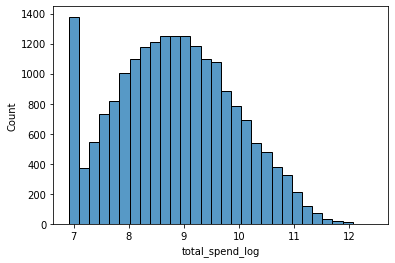

In [ ]:
sns.histplot(x='total_spend_log', data=bookings, bins=30)

In [ ]:
# Engineering a feature for the total spend per guest
# bookings['total_spend_log_guest'] = bookings['total_spend_log'] / bookings['n_guests']

**Aggregating Data per Customer**

In [ ]:
bookings.describe()

,customer_id,n_guests,total_spend,is_domestic,is_one_way,days_advanced,flight_quarter,total_spend_log
count,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000
mean,5022.297896,2.129155,12174.377636,0.559404,0.630479,34.830909,3.179037,8.829098
std,2878.144918,1.396971,15552.610989,0.496471,0.482687,23.118791,0.993800,1.079729
min,1.000000,1.000000,1000.000000,0.000000,0.000000,2.000000,1.000000,6.907755
25%,2550.500000,1.000000,3102.476270,0.000000,0.000000,14.000000,2.000000,8.039956
50%,5007.000000,1.000000,6691.508762,1.000000,1.000000,20.000000,4.000000,8.808595
75%,7500.000000,3.000000,14636.854291,1.000000,1.000000,59.000000,4.000000,9.591298
max,10000.000000,10.000000,250778.844303,1.000000,1.000000,90.000000,4.000000,12.432327


In [ ]:
customer_agg = bookings.groupby('customer_id').agg(
  flight_count = ('customer_id','count'),
  avg_n_guests = ('n_guests','mean'),
  avg_spend_log = ('total_spend_log','mean'),
  ratio_domestic = ('is_domestic','mean'),
  ratio_one_way = ('is_one_way','mean'),
  avg_days_advanced = ('days_advanced','mean'),
  max_days_advanced = ('days_advanced','max'),
  min_days_advanced = ('days_advanced','min')
)
customer_agg.head()

#  max_guests = ('n_guests','max'), min_guests = ('n_guests','min'), max_spend_log = ('total_spend_log','max'), min_spend_log = ('total_spend_log','min'), max_days_advanced = ('days_advanced','max'), min_days_advanced = ('days_advanced','min')


,flight_count,avg_n_guests,avg_spend_log,ratio_domestic,ratio_one_way,avg_days_advanced,max_days_advanced,min_days_advanced
customer_id,,,,,,,,
1,2,5.000000,8.950041,1.000000,0.000000,10.0,11,9
2,6,1.333333,8.455019,0.666667,0.666667,29.5,63,9
3,2,2.000000,8.991347,0.500000,0.500000,36.0,59,13
4,4,3.000000,9.695430,0.250000,1.000000,49.5,67,12
5,1,1.000000,7.494683,1.000000,1.000000,20.0,20,20


In [ ]:
import statistics as stats
customer_agg['flight_quarter_mode'] = bookings.groupby('customer_id')['flight_quarter'].apply(stats.mode)
customer_agg

,flight_count,avg_n_guests,avg_spend_log,ratio_domestic,ratio_one_way,avg_days_advanced,max_days_advanced,min_days_advanced,flight_quarter_mode
customer_id,,,,,,,,,
1,2,5.000000,8.950041,1.000000,0.000000,10.0,11,9,2
2,6,1.333333,8.455019,0.666667,0.666667,29.5,63,9,4
3,2,2.000000,8.991347,0.500000,0.500000,36.0,59,13,4
4,4,3.000000,9.695430,0.250000,1.000000,49.5,67,12,4
5,1,1.000000,7.494683,1.000000,1.000000,20.0,20,20,2
...,...,...,...,...,...,...,...,...,...
9996,3,3.000000,9.149363,0.666667,0.333333,24.0,56,7,2
9997,1,1.000000,8.658777,1.000000,1.000000,8.0,8,8,4
9998,4,3.000000,8.170114,1.000000,0.500000,17.5,21,14,4


**Choosing variables orthogonally/linearly**

improving goodness of fit

improving parsimony

pruning

# Deriving Features from Customer Dataset

**Age**

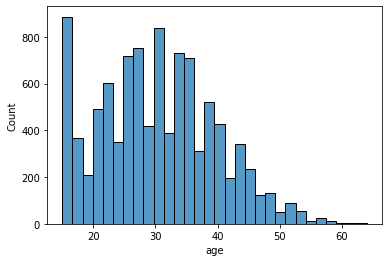

In [ ]:
sns.histplot(x='age',data=bookers, bins=30)

**Sex**

In [ ]:
bookers['sex'].value_counts()

F        5104
M        4592
Other     304
Name: sex, dtype: int64

**Region**

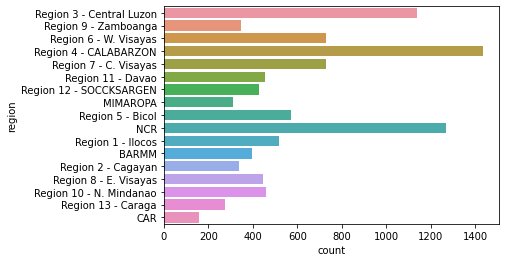

In [ ]:
sns.countplot(y='region',data=bookers)

**Major Region**

Luzon       5736
Mindanao    2358
Visayas     1906
Name: major_region, dtype: int64


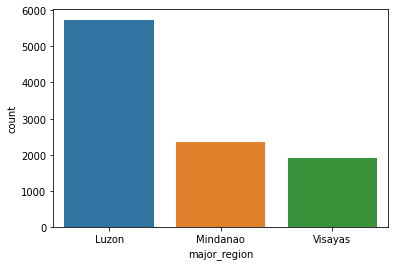

In [ ]:
print(bookers['major_region'].value_counts())
sns.countplot(x='major_region',data=bookers)

In [ ]:
# More than 50% of customers are from Luzon - engineer a boolean feature: From Luzon or not
bookers['from_luzon'] = np.where(bookers['major_region']=='Luzon',1,0)

**Marital status**

In [ ]:
# Convert married T/F to single 0/1
bookers['single'] = np.where(bookers['married']==True,0,1)

**Number of children**

0    8105
1    1089
2     547
3     205
4      43
5       9
6       1
8       1
Name: no_of_children, dtype: int64


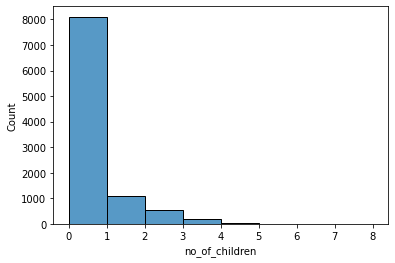

In [ ]:
print(bookers['no_of_children'].value_counts())
sns.histplot(x='no_of_children', data=bookers, bins=8)

In [ ]:
8105/10000*100

81.05

In [ ]:
# 81% of the customers have no children - engineer a boolean feature: Has child or not
bookers['has_children'] = np.where(bookers['no_of_children'],1,0)

**Engineered Customers table**

In [ ]:
customers_eng = bookers.drop(columns=['region','major_region','married','no_of_children'])
customers_eng.head()

,age,sex,from_luzon,single,has_children
customer_id,,,,,
1,36,F,1,0,1
2,37,M,0,1,0
3,29,M,0,1,1
4,25,F,1,0,1
5,36,F,1,1,0


# Joining

In [ ]:
customers = customers_eng.join(customer_agg, on='customer_id')
customers.head(10)

,age,sex,from_luzon,single,has_children,flight_count,avg_n_guests,avg_spend_log,ratio_domestic,ratio_one_way,avg_days_advanced,max_days_advanced,min_days_advanced,flight_quarter_mode
customer_id,,,,,,,,,,,,,,
1,36,F,1,0,1,2,5.000000,8.950041,1.000000,0.000000,10.000000,11,9,2
2,37,M,0,1,0,6,1.333333,8.455019,0.666667,0.666667,29.500000,63,9,4
3,29,M,0,1,1,2,2.000000,8.991347,0.500000,0.500000,36.000000,59,13,4
4,25,F,1,0,1,4,3.000000,9.695430,0.250000,1.000000,49.500000,67,12,4
5,36,F,1,1,0,1,1.000000,7.494683,1.000000,1.000000,20.000000,20,20,2
6,15,M,0,1,0,3,1.666667,9.142434,0.333333,0.333333,41.333333,56,19,4
7,36,M,1,1,0,3,1.666667,7.667244,1.000000,0.666667,15.333333,17,13,4
8,27,M,1,0,0,2,4.000000,8.746109,1.000000,0.500000,17.000000,20,14,2
9,27,F,0,0,0,1,2.000000,8.184366,1.000000,1.000000,12.000000,12,12,4
